# Livrable 1 : Modélisation 

Équipe 2 : MALONDO Emmanuel, KURRIMBOCCUS Anya, FIET Jordan, PILLON Antoine, LECHATREUX Pierre

## Introduction 

 

L’ADEME (Agence de l’Environnement et de la Maîtrise de L’Energie) a lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentation de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires. Notre équipe a été mise en place par le CesiCDP pour répondre à l’appel de l’ADEME. 

CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, elle a réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif. 

La mise en place de notre équipe suit l’enjeu visé par CesiCDP qui est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer son activité. 

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison.





### Objectifs de ce livrable  

- Reformuler le problème de manière formelle 

- Modéliser le problème et le formuler mathématiquement

- Étudier les propriétés théoriques (complexité) 

- Produire un pseudo code

 

### Objectif de la mission 

 

Sur un réseau routier, nous devons calculer une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de façon à minimiser la durée de la tournée. Les calculs que nous ferons devront prendre en compte la charge du trafique routier qui impactera le temps de la tournée.  

Pour finir, l’idée ici, est de proposer une méthode issue de la RO (Recherche Opérationnelle) pour générer une tournée de livraison correspondant à ce problème. 


# Contraintes

Concernant la tournée de livraison, nous devons prendre en compte certaines contraintes. 
Tout d'abord, nous avons choisi d'intégrer à notre problème la contrainte concernant le nombre k de camions disponibles simultanément.De plus, nous pouvons prendre en compte sa contrainte avancée indiquant que certains objets ne peuvent être livrés que par certains camions.
Ainsi, les espaces de solutions pourra être restreint car certaines solutions seront invalidées.

## Données 

 

Pour répondre à l’appel de L’ADEME, nous avons identifié certaines données qui vont nous aider : 

 

- Nombre n de points. Les points sont ici les points de livraisons que nous avons à parcourir. Pour ce projet, nous avons décidé de placer un point de livraison par ville. Ces villes sont récupérables grâce à des cartographies existantes. 

- Les arêtes entre chaque point. Ceci correspond aux trajets permettant de se rendre d’une ville de départ à une ville d’arrivée. 

- Charge des arêtes. La charge des arêtes, correspond dans notre cas, au temps de trajet entre deux villes. 

- Nombre k de camions déployés. Cela correspond au nombre de camions en circulation permettant de délivrer les objets à déposer. 

- Durée d de la tournée. Cela correspond au temps pris par k camions pour que tous les points de livraison soient parcourus puis pour que les camions reviennent au point de départ. Cela correspond aussi à la somme des charges des arrêtes parcourues pendant la tournée. 

# Modélisation du problème



L’objectif de notre mission et les données à notre disposition nous permettent de délimiter le problème qui devra être résolu à l’aide de l’algorithme que l’on concevra. 

Pour cela, nous pouvons représenter le problème à l'aide d'un graphe. Ici, nous avons choisi de représenter les grandes villes de France et de les relier entre les 4 villes les plus proches de chacune. Ainsi, nous aurons une représentation plus réaliste, et le graphe ne sera donc pas complet. Le point vert de Rouen représente le point de départ et d'arrivée.
Voici ci-dessous cet exemple de modélisation :

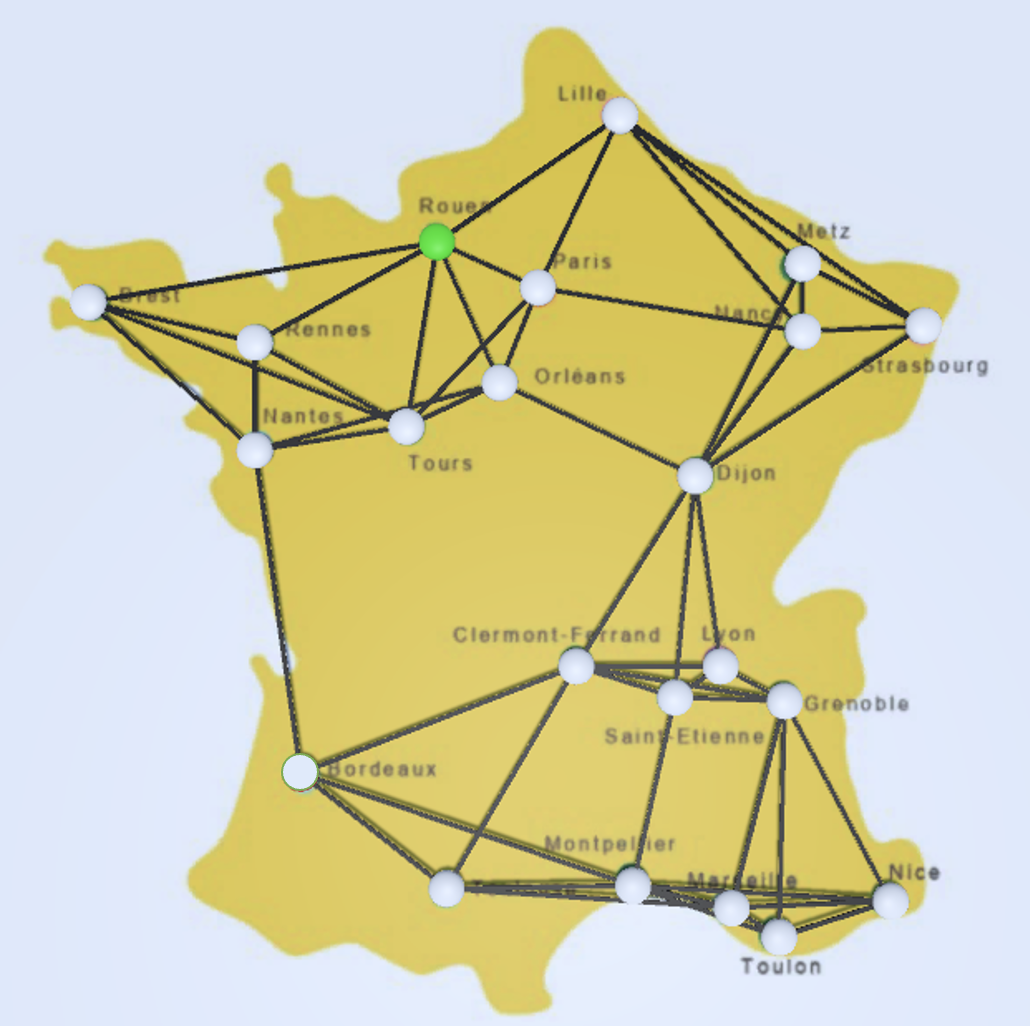


Cette représentation sous forme de graphe sur une carte n'est pas utilisable telle quelle par un algorithme. Il va donc falloir modéliser ce graphe sous une représentation adaptée pour notre mission.

Il existe 3 représentations possibles d'un graphe sous une forme utilisable par un algorithme: 
- Liste d'arêtes(edge list)
- Liste d'adjacence(adjacency list)
- Matrice d'adjacence(adjacency matrix)

###### Liste d'arrêtes
La liste d'arêtes représente chaque arête du graphe avec le sommet de départ suivi du sommet d'arrivée, tel que : 
Si on a un graphe non-orienté composé de deux sommets tout deux reliés par une arête, la liste d'arête du graphe sera la suivante :

$ A \rightarrow B$

$ B \rightarrow A$

Et voici un exemple avec le graphe proposé plus haut : 

$ Rouen \rightarrow Paris$

$ Rouen \rightarrow Orléans$

$ Rouen \rightarrow Tours$

$ Rouen \rightarrow Rennes$

ect...

Ce type de représentation peut vite devenir lourd en mémoire quand on manipule des graphes de plus en plus denses. Dans le cas du graphe avec les grandes villes de France que l'on a utilisé plus haut, le nombre d'arête est déjà conséquent, ce mode de représentation n'est donc pas idéal dans les cas que l'on va aborder avec cette mission. Surtout lorsqu'il faudra déterminer la tournée la plus courte. 

###### Liste d'adjancence
La liste d'adjacence représente chaque sommet du graphe et ses successeurs dans un tableau de listes. La taille du tableau est égale au nombre de sommets du graphe donc n dans notre cas. Chaque cellule i du tableau correspond la liste des successeurs du sommet i. Voici un exemple de cette modélisation avec le graphe proposé plus haut en ne prennant uniquement en compte les sommets Rouen, Lille, Metz, Brest et Paris, dans cet ordre : 

[

Sommet(Rouen)    [Lille, Brest, Paris],

Sommet(Lille)    [Rouen, Metz, Paris],

Sommet(Metz)    [Lille ],

Sommet(Brest)    [Rouen ],

Sommet(Paris)    [Rouen, Lille]
    
]

L'avantage principal de ce type de représentation est son utilisation plus faible de la mémoire, car on ne stocke que les noeuds existants dans le graphe. Cela fonction dans tous les types de graphes, denses ou clairsemés. L'utilisation maximale de l'espace est constament inférieure à $O(N^2)$. 


###### Matrice d'adjacence
La matrice d'adjacence est un tableau 2D de taille $(n * n)$, où on rappelle que $n$ est le nombre de villes(sommets) du graphe.

Si le tableau se présente comme suit : france = [][], alors une cellule france[ i][ j]=1 ( où i et j sont des entiers supérieurs à 0), indique qu'il existe une arête partant du sommet i et allant vers le sommet j.

À noter que  la matrice d'adjacence d'un graphe non orienté est toujours symétrique, c'est le cas pour le graphe des grandes villes de France que l'on a présenté plus haut.

La matrice d'adjacence peut aussi être utilisée pour représenter des graphes pondérés, il suffit alors de remplacer le 1 représentant la présence d'une arête entre deux sommets par le poids de la dite arête. Dans l'exemple de notre mission, le poids des arêtes sera un temps, voici donc un exemple de matrice d'adjacence ne prennant uniquement en compte les sommets Rouen, Lille, Metz, Brest et Paris, dans cet ordre :

Le poids est en minutes

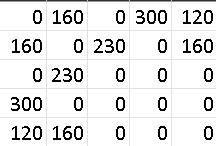

Ce type de réprésentation est facile à mettre en oeuvre et à maintenir. Supprimer une arête prend un temps $O(1)$. Et des requêtes qui permettent de vérifier la succession ou la prédécession des sommets peuvent aussi être effectuées en un $O(1)$

Mais cette modélisation consomme plus d'espace que les deux autres types de modélisations vues plus haut. Même si le graphe est moins dense, la consommation d'espace restera la même. 
Ajouter un sommet a aussi un temps $O(V^2)$.

##### Modélisation choisie pour cette mission 

Pour cette mission, la modélisation qui sera utilisée à l'entrée de notre algorithme sera la matrice d'adjacence.

Cette modélisation est très efficace pour vérifier la présence de prédécesseurs et de successeurs à un sommet. C'est ce que notre algorithme va principalement faire pour vérifier la présence de cycles hamiltoniens dnas le graphe. De plus, la possibilité de pondérer la matrice, va être très utile lors de la recherche de la tournée la plus courte. 

# Étude de la complexité du problème

Après analyse du contexte de ce projet, nous pouvons remarquer qu'il ressemble au problème du voyageur de commerce. Le but est de réaliser un parcours de points le plus rapidement possible (de manière optimisée) tout en passant une fois et une seule fois seulement par chaque point.

En prenant ce problème comme base, il est possible de l’étendre à celui de la tournée de véhicules aussi appelé VRP pour "Vehicle Routing Problem". Il s’agit cette fois-ci de déterminer les tournées de plusieurs véhicules simultanément afin de visiter une liste de clients, ce qui correspond à l'ajout de notre contrainte. De la même manière que pour le problème du voyageur de commerce, le VRP appartient aux problèmes de la classe de complexité dit <b>NP-Complet</b>, autrement dit il est à la fois NP et NP-Difficile.

https://dial.uclouvain.be/memoire/ucl/en/object/thesis%3A17209/datastream/PDF_01/view#:~:text=Le%20VRP%2C%20et%20les%20deux,des%20probl%C3%A8mes%20dits%20NP%2Dcomplets

Comme pour la plupart des problèmes NP-complet, il est difficile de résoudre des instances de grande taille de manière optimale. Ce qui signifie que les seules solutions déterminables seront approximatives. 
Dans l'optique d'obtenir des solutions dans des temps de calculs raisonnables et exploitables, nous devons nous tourner vers des méthodes approchées à base de méta-heuristiques. Ces méthodes de calcul nous permettrons d'atteindre une solution approchée, comme pour ce genre de problème, et non une solution pour un problème particulier qui se rapproche plus de l'utilisation des heuristiques.

https://www.enseignement.polytechnique.fr/informatique/INF423/uploads/Main/chap12-good.pdf

# Formulation mathématique du problème

- https://doc.rero.ch/record/32038/files/MASBA_6.pdf

Données : 

Soit un graphe G non orienté G = (V, E) où :

- <b>V</b> un ensemble dont les éléments sont les sommets {1,2...n} du graphe G (représentant les villes)
- <b>E</b> un sous-ensemble E dont les éléments, les arêtes du graphe, sont des parties à un ou deux éléments de V.

Et : 

- <b>K</b> l'ensemble de camions disponibles {1,2..k}
- <b>M</b> l'ensemble des types d'objets transportés
- <b>$T_{i}$</b> le type de marchandise
- <b>d</b> la distance parcourue
- <b>I</b> l'ensemble des noeuds à visiter

- <b>$x_{ijk}$</b> est la variable de décision binaire indiquant si un camion k passe passe par une arête (i, j)
- <b>$y_{ikm}$</b> est la variable de décision binaire indiquant si un camion k transporte un type de marchandise m au noeud i

## Fonction objectif

Notre objectif ici est de minimiser la distance d parcourue, afin d'effectuer une tournée efficace. Ainsi, nous pouvons déterminer la fonction objectif de cette manière :

- $minimiser \sum_{i \in V} \sum_{j \in V, j \ne i} d_{ij}x_{ijk}$

### Soumises aux contraintes : 

- chaque ville ne doit être visitée qu'une fois par l'un des camions : $\sum_{j} x_{ijk} = 1, \forall i$
- chaque camion doit commencer et terminer sa tournée au dépot : $\sum_{i} x_{ijk} = 1, \forall j \in V $ \ {0} (noeud de dépot)
- les camions ne peuvent transporter que certains types de marchandises : $y_{ikm} \le x_{ijk}, \forall i \in V, j \in V $ \ {0}, $ k \in K, m \in M$
- les variables de décision sont binaires : $x_{ijk}, y_{ikm}  \in \{0,1\}, \forall i \in V, \forall j \in V, \forall k \in K, \forall m \in M$ 
 
## Problème de décision :  


Soit <b>t</b>, un temps établi arbitrairement. 
Soit <b>C</b>, un chemin déterminé par notre algorithme. 

<b>Existe-t-il un chemin C passant par chaque point une seule fois, puis revenant au point de départ, pour lequel la durée d est inférieure à t ?</b>
 

Notre algorithme devra être capable de déterminer un chemin C pour lequel la réponse au problème de décision est ‘oui’.  
 
Mais, il devra aussi être capable de déterminer le chemin C ayant la durée d la plus petite possible. Cela nous permet donc d’énoncer le problème d’optimisation ci-dessous. 

## Problème d’optimisation :  
			 

Quelle est la plus petite valeur de d pour laquelle la réponse au problème de décision émis est oui ?


# Pseudo-code

Afin de définir notre solution, nous devons procéder aux étapes suivantes :

1. Sélection de la ville ou de la zone Complexité : O(1)

2. Placement aléatoire des points de livraison sur les intersections (nombre de points de livraison : un pourcentage du nombre total de points, par exemple 5% ou 10%) Complexité : O(n)

Utilisation d'un algorithme de Christofides modifié pour démontrer mathématiquement notre approche (Référence : https://apps.dtic.mil/dtic/tr/fulltext/u2/a025602.pdf)

3. Construction d'un arbre de poids minimal, en prenant en compte uniquement les points de livraison sélectionnés, sans chercher à couvrir tous les points de la ville Complexité : O(n)

4. Création d'un sous-graphe à partir de l'arbre précédent, contenant uniquement les sommets de degrés impairs Complexité : O(n)

5. Sélection des arêtes de poids minimal pour relier chaque paire de sommets de degrés impairs et ajout de ces arêtes à notre arbre de poids minimal. Les autres arêtes sont marquées comme "à supprimer" Complexité : O(n)

6. Calcul du parcours du tour eulérien de l'arbre, puisque celui-ci est maintenant un cycle eulérien suite à l'étape précédente Complexité : O(n)

7. Marquage des arêtes parcourues deux fois sur le même point lors du tour effectué, en les désignant comme "à supprimer" Complexité : O(n)

8. Suppression de toutes les arêtes marquées comme "à supprimer" dans l'étape 6 et 8, à partir de la copie du graphe réalisée à l'étape 4 Complexité : O(n)

## Différentes métaheuristiques


Tout d'abord, nous avons vu précedemment que notre problème de voyageur de commerce s'apparente plus à un problème de tournées de véhicules, et que ce type de problème et ses variantes peut être résolu car à des méta-heuristiques.
Il existe plusieurs type de métaheuristiques. Nous pouvons comparer les principales et sélectionner celle qui nous semble être la plus pertinente.

#### Recuit simulé
#### Tabou
#### Grasp
#### Voisinage variable
#### Voisinage large
#### Algorithme génétique
#### Colonie de fourmis

### Tableau comparatif

- https://hal.univ-lorraine.fr/tel-03132558/file/DDOC_T_2020_0154_OULAD_KOUIDER.pdf 

# Bibliographie

- VRP : https://homepages.laas.fr/sungueve/Docs/PhD/These_SUNGUEVEU_20062009.pdf
- https://madhu.seas.harvard.edu/papers/2010/pnp.pdf 
- https://www.sciencedirect.com/topics/mathematics/computational-problem 
- https://www.seh.ox.ac.uk/blog/an-introduction-to-research-in-computational-complexity-theory 